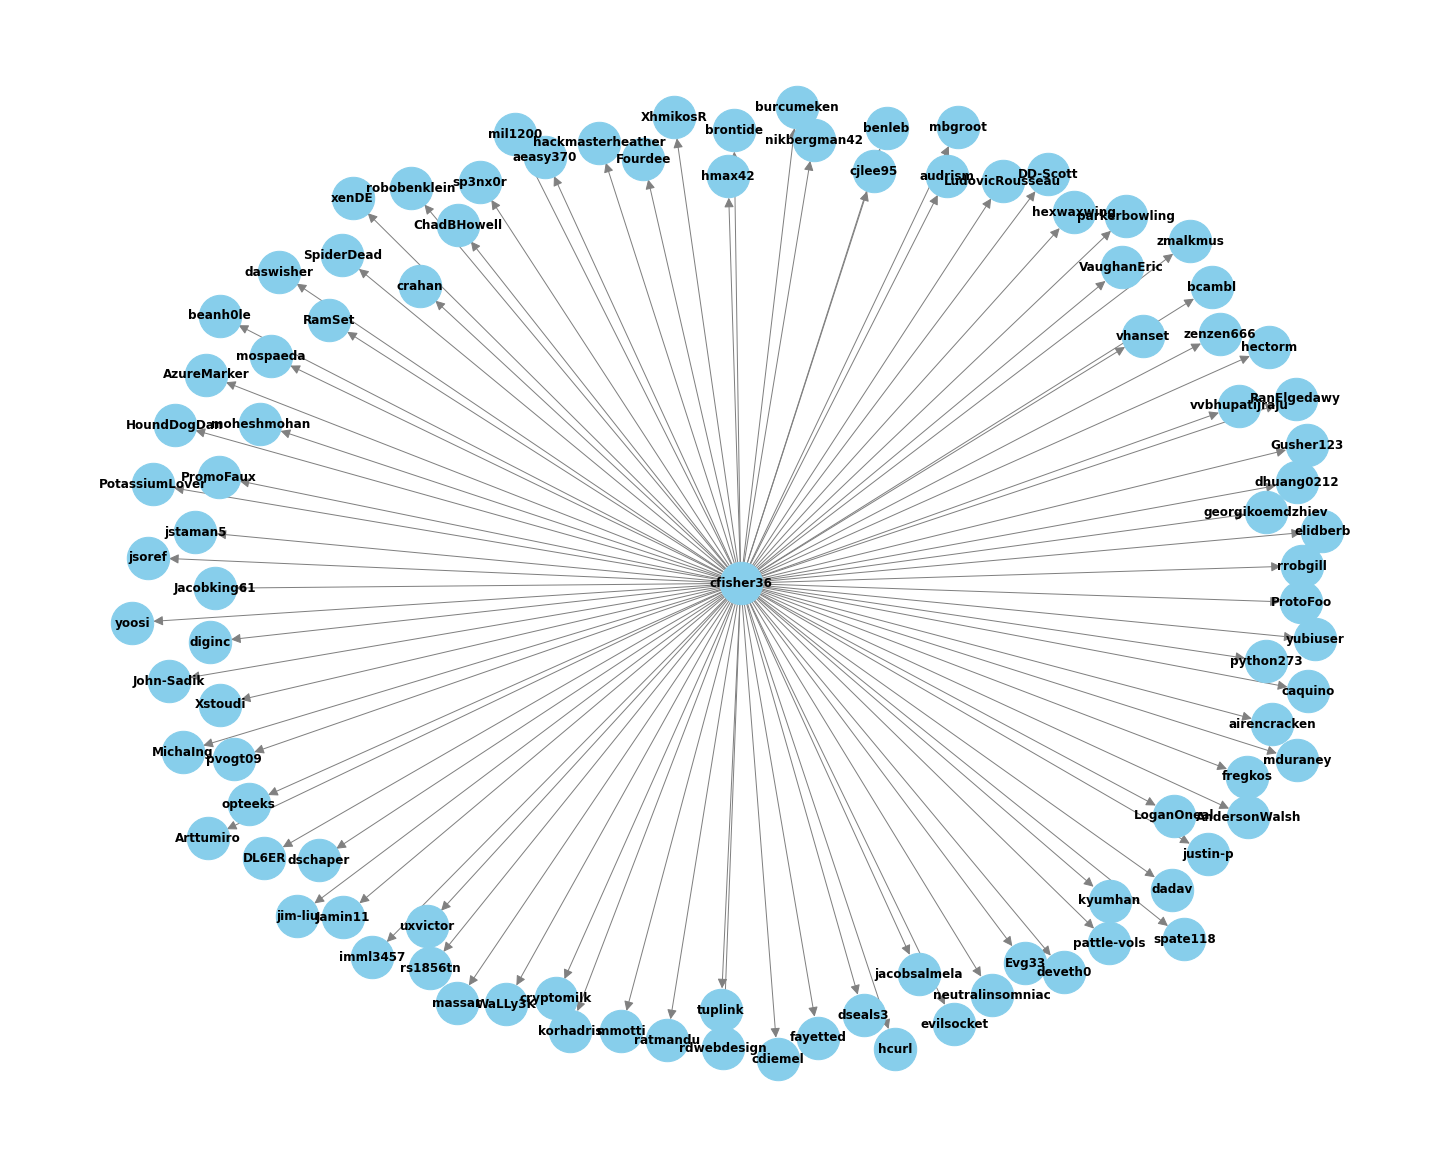

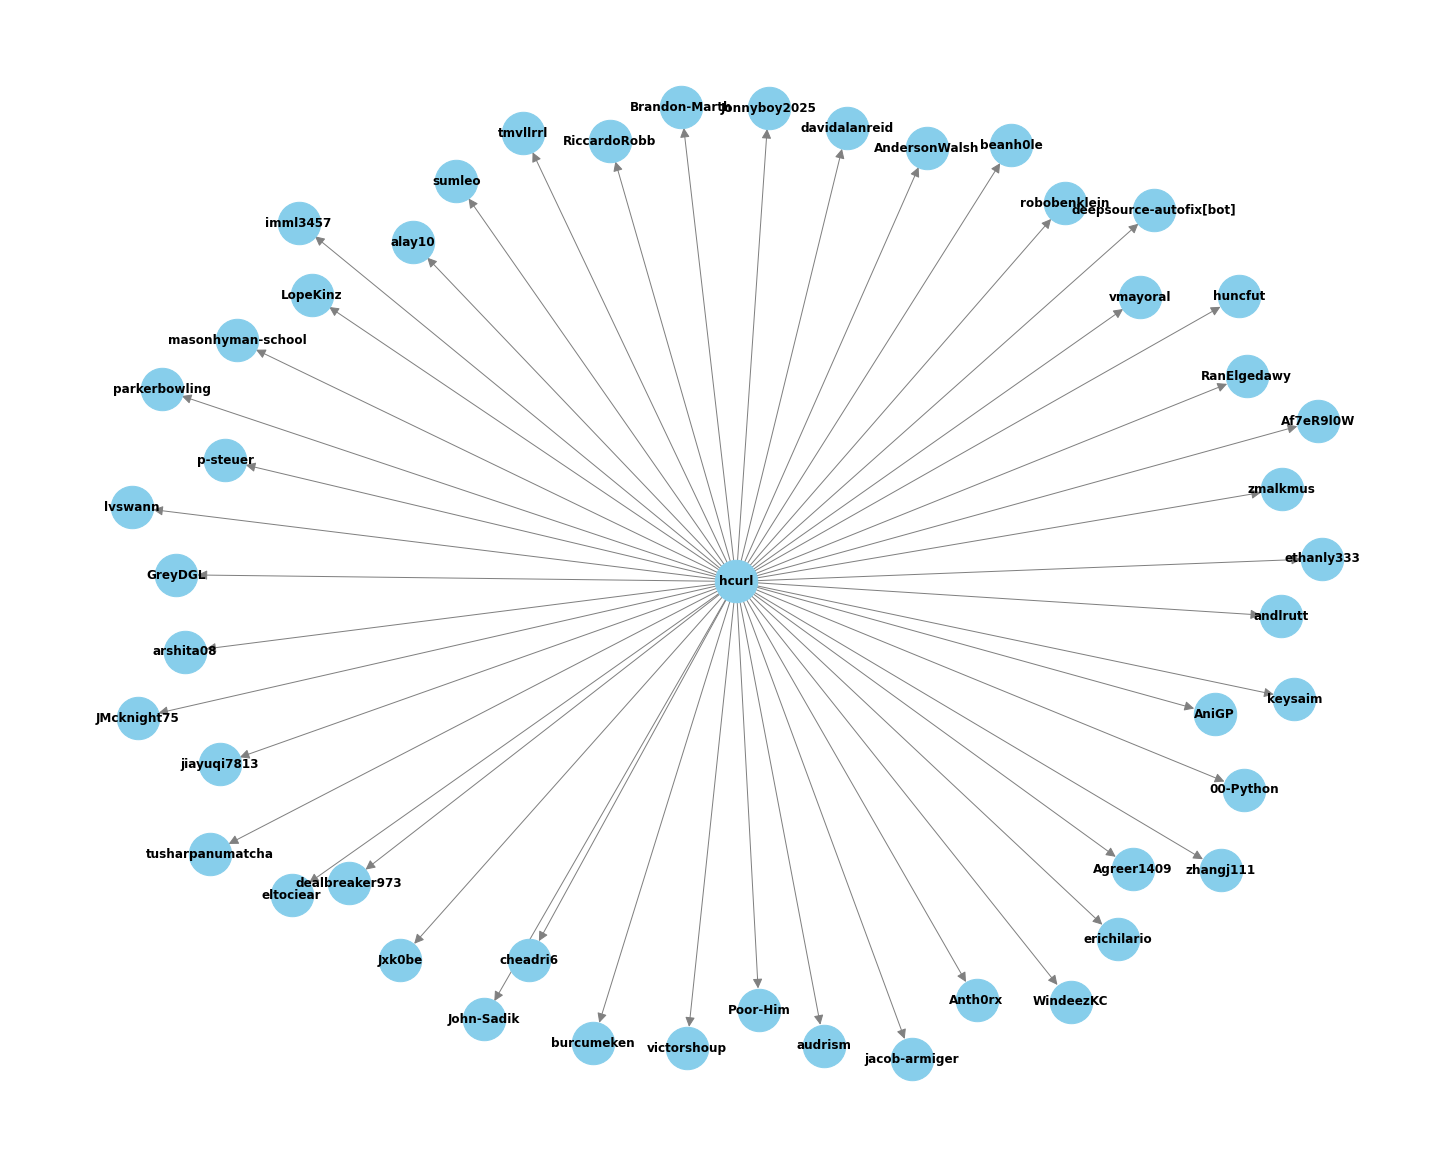

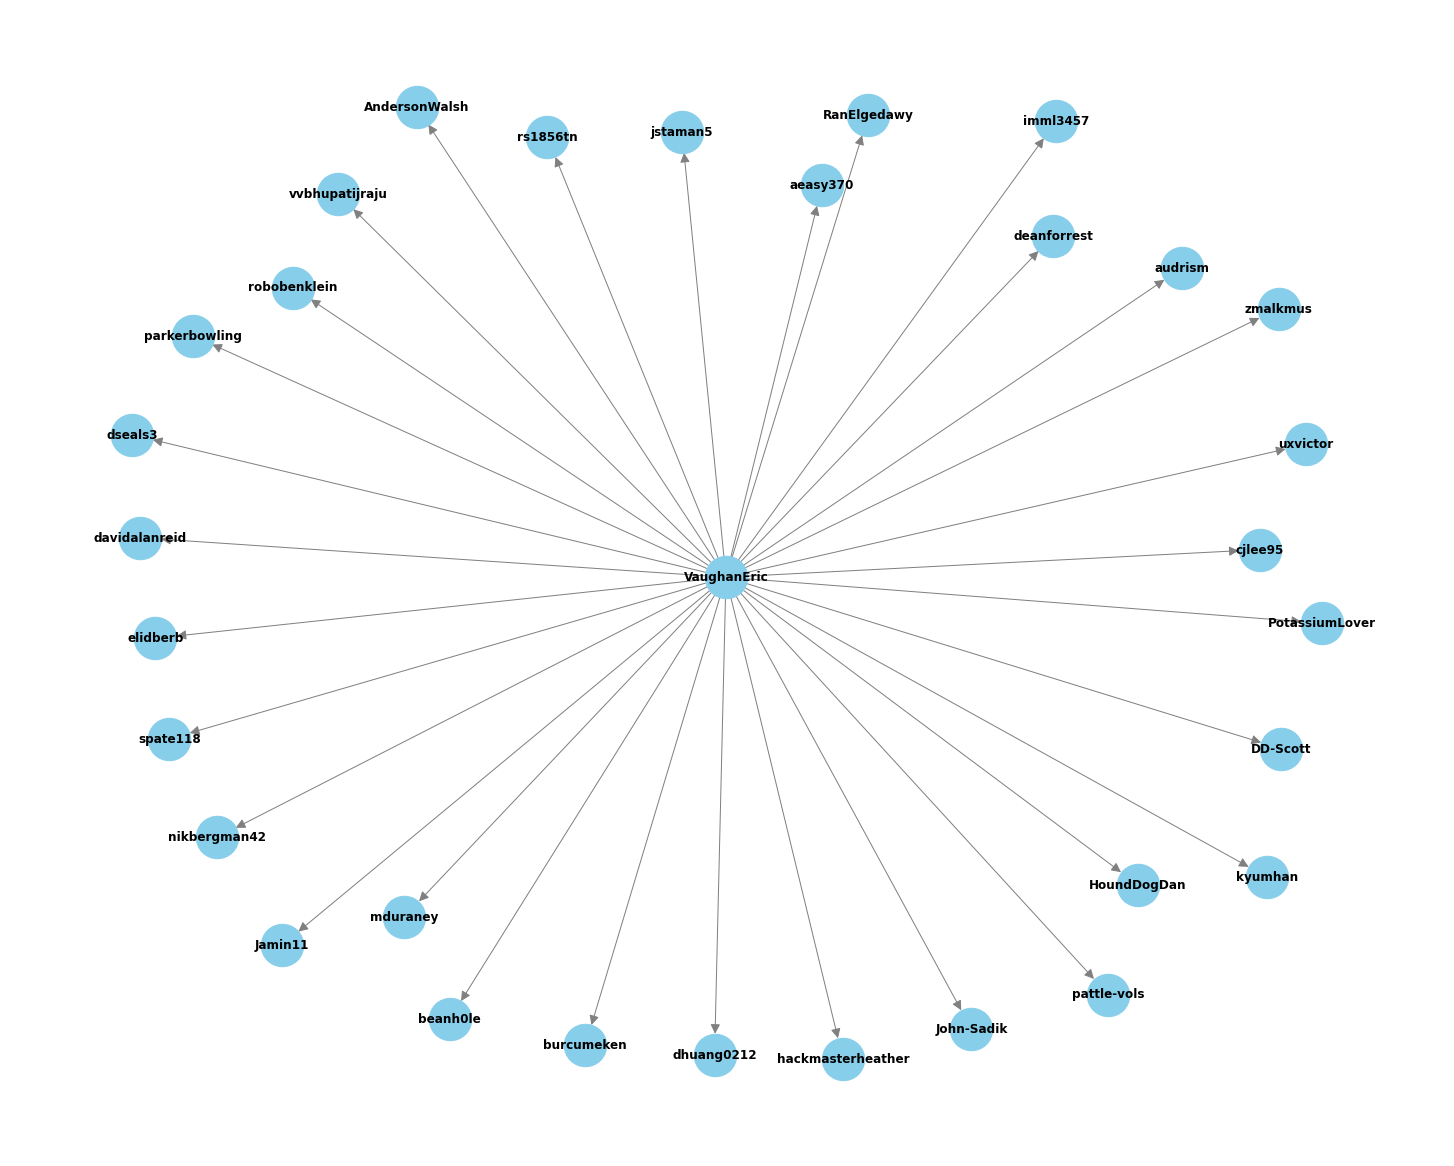

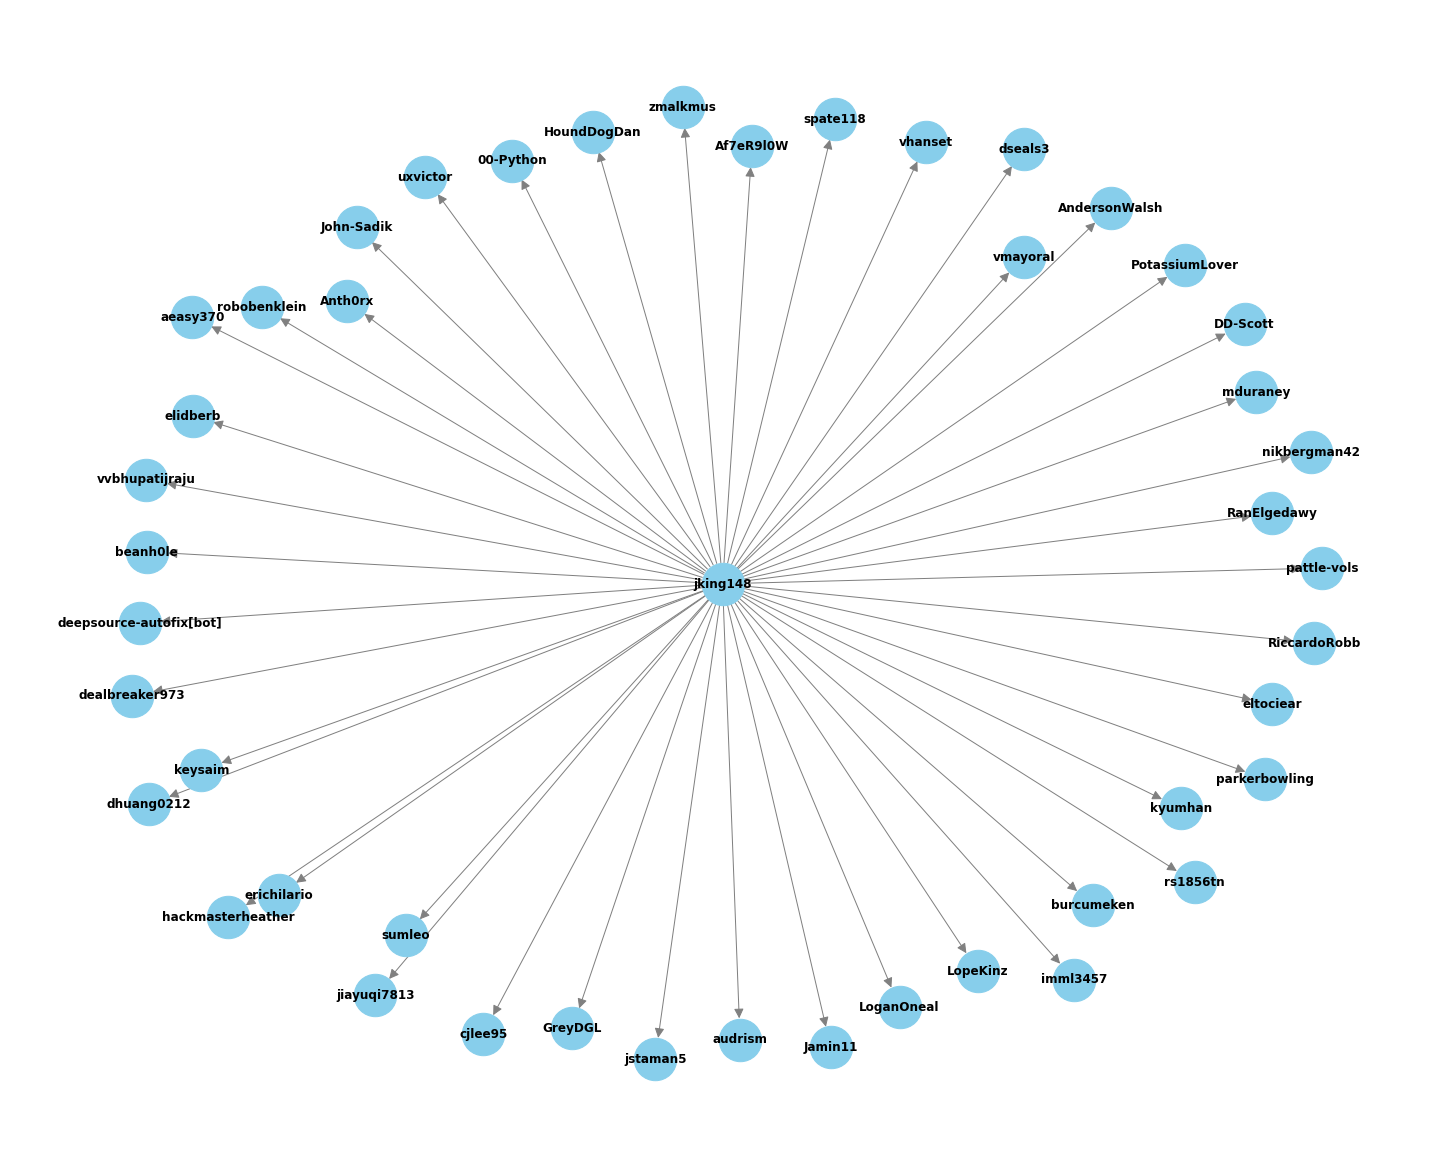

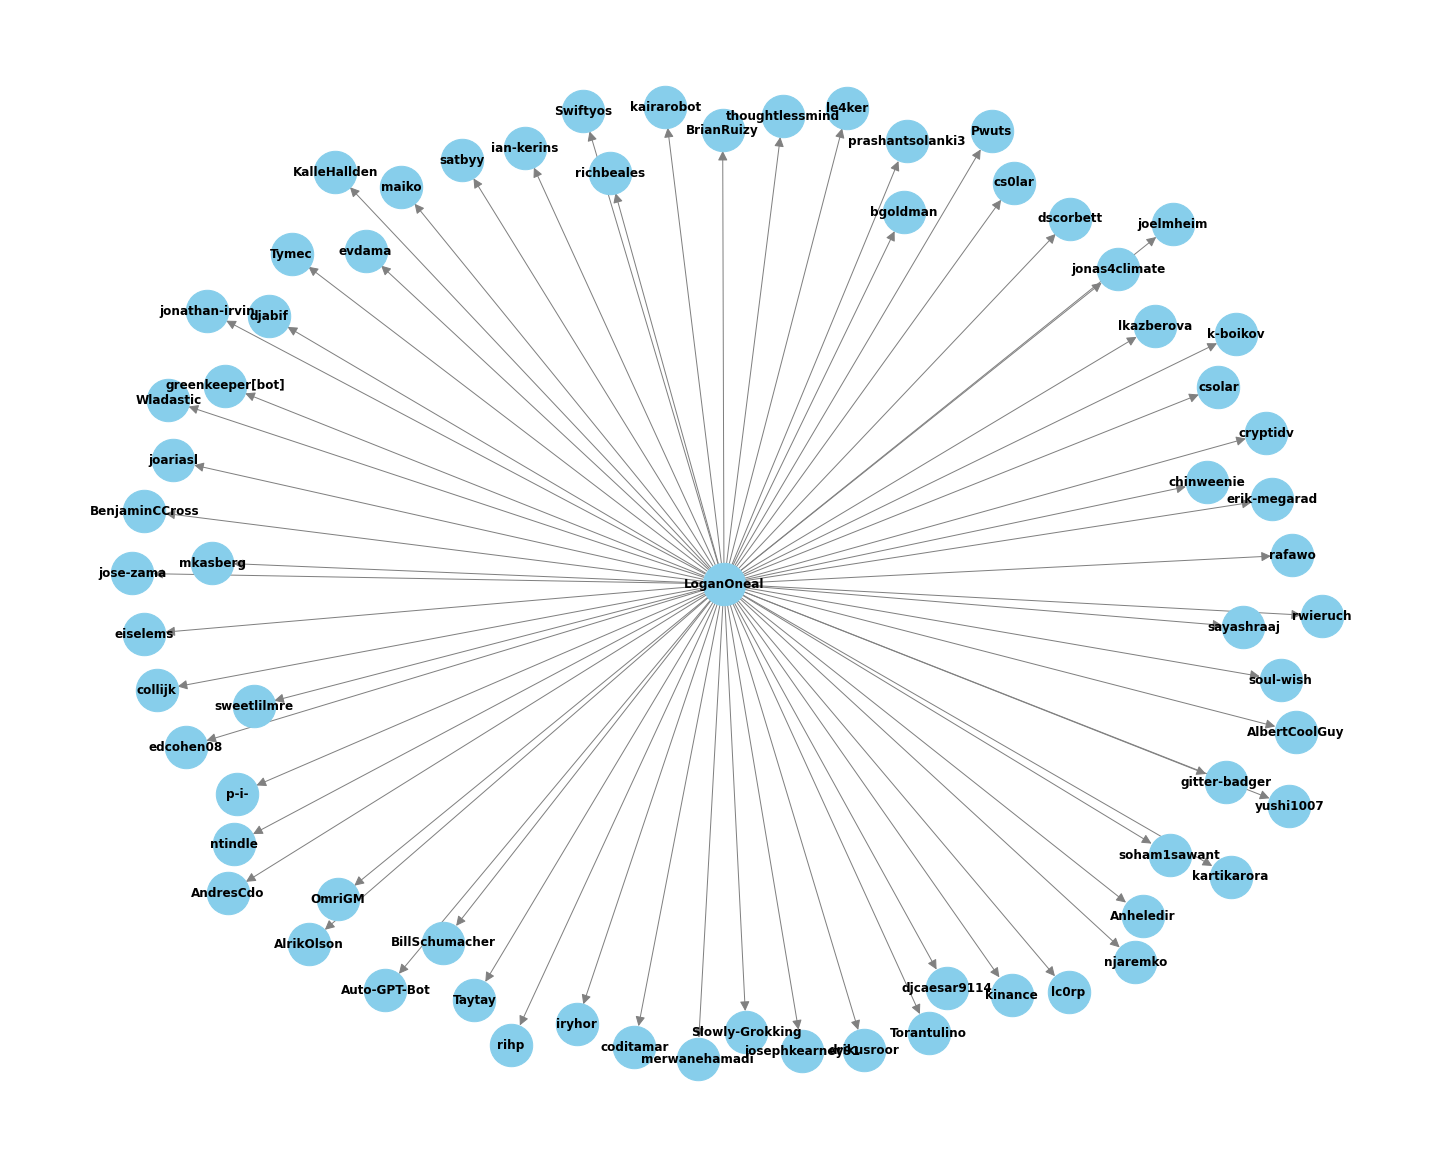

In [1]:
import requests
import matplotlib.pyplot as plt
import networkx as nx

def create_node_tree(collaborators, user):
    G = nx.DiGraph()

    G.add_node(user)

    for node in collaborators:
        if node != user:
            G.add_edge(user, node)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(20, 16))
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1800, node_color='skyblue', font_size=12, font_color='black', edge_color='gray', arrowsize=20)

    plt.show()

users = {'jking148', 'cfisher36', 'LoganOneal', 'hcurl', 'VaughanEric'}
token = '' #Place Github API token here

base_url = 'https://api.github.com'

for user in users:
    session = requests.Session()
    session.auth = (user, token)
    license_info = {}
    total_repos = 0

    repos_url = f'{base_url}/users/{user}/repos'
    response = session.get(repos_url)
    repos = response.json()
    collaborators = []

    for repo in repos:
        repo_name = repo['name']
        collaborators_url = f'{base_url}/repos/{user}/{repo_name}/contributors'

        response = session.get(collaborators_url)
        if response.status_code == 200:
            collabs = response.json()
#             print(collabs)
            for collab in collabs:
                collab_name = collab['login']
#                 print(collab_name)
                collaborators.append(collab_name)
    
    collaborators_set = set(collaborators)
    create_node_tree(collaborators_set, user)
